# **By: Caleb Choo**


# **GRIP Data Analysis Task 1**
Prediction using supervised machine learning. In this task, we will use a simple linear regression model to predict the percentage of marks a student is expected to score in an exam relative to the number of hours they studied. In this simple linear regression model, there are only two variables.



## **Importing Libraries**


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

## **Loading Data**


In [27]:
url = "student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(20)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## **Plotting A Graph To Analyze The Basic Relationship**


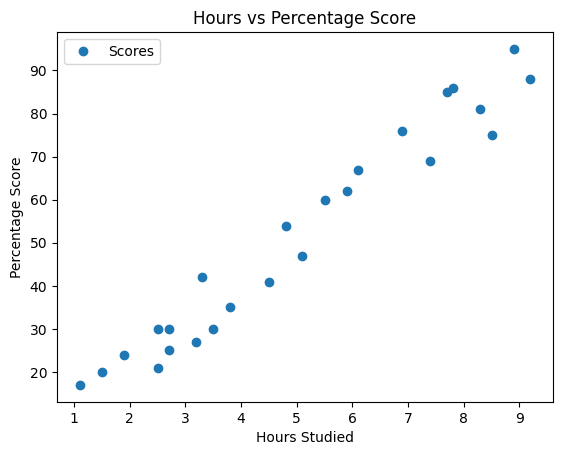

In [28]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **As seen from the graph above, the greater the hours studied, the greater the percentage score**


## **Extracing And Training Data**


In [29]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training has been completed.")

Training has been completed.


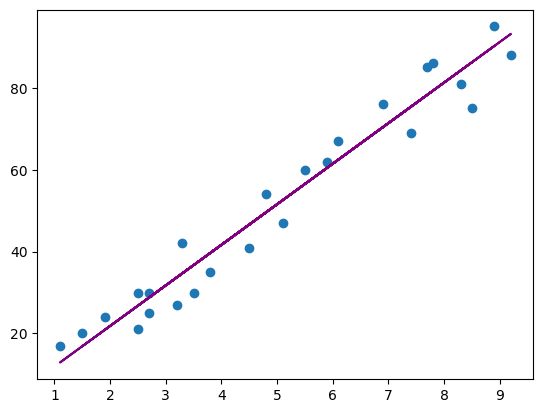

In [30]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line, color='purple');
plt.show()

### **Making Predictions**
We use our trained algorithms to make predictions

In [31]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Comparing Two Sets Of Data**

We can now test our algorithm and draw other graphs for comparison


In [36]:
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


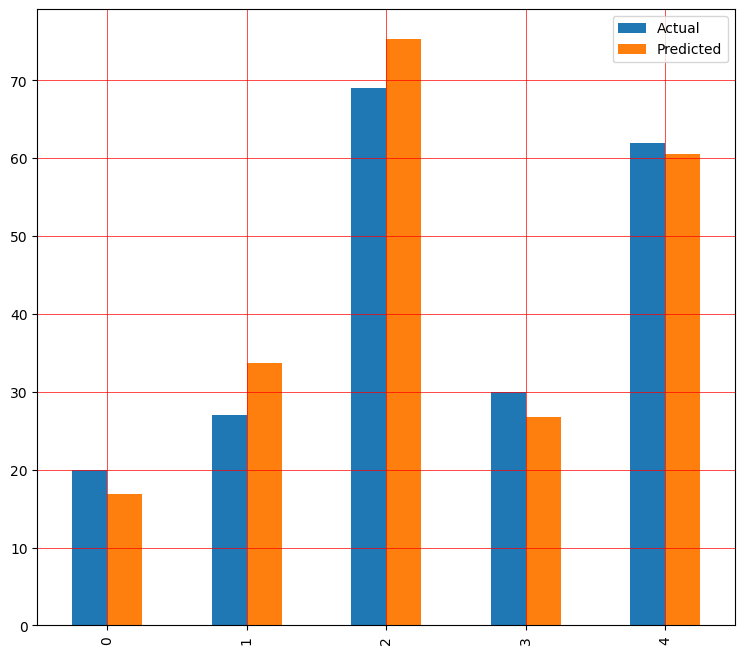

In [41]:
df.plot(kind='bar',figsize=(9,8))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [42]:
hours = 10
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 10
Predicted Score = 101.12472484785707


### **Evaluating Performance**

In [46]:
from sklearn import metrics  

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
Variance Score: 0.9482829156738145
R-2: 0.9454906892105354


R^2 value analyzes how good of a fit our model is, relative to the actual data. It is a range from 0-1. The closer to 1, the better the fit. Given t